# ACTIVIDAD 01

Santiago Reyes Castillo  
23 de Enero, 2024  
745826

Para los datos de los archivos "bateria_tableta.txt" y "Salarios_minimos.csv":

- Realiza regresiones polinomiales de orden 1, 3, 5 y 7.

- Compara el R2 que te da cada modelo.

- Crea una gráfica con una nube de dispersión (datos originales) y tus modelos.

Separa adecuadamente con Markdown.

In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#### Definimos una función...
Que nos permita generar una regresión si le ingresamos un dataframe, los nombres de las columnas de las variables X y Y, y el grado del polinomio más alto que queramos para el modelo.

In [307]:
def regression(df, col_n_x, col_n_y, degree):

    x = np.reshape(df[col_n_x], [-1,1])
    y = np.reshape(df[col_n_y], [-1,1]) 
    
    X = x.copy()
    for i in range (2, degree+1):
        X = np.hstack((X, x**i))

    model = LinearRegression()
    model = model.fit(X, y)

    intercept = model.intercept_
    coef = model.coef_

    r2 = model.score(X,y)

    y_pred = model.predict(X)

    sorted_indices = np.argsort(x[:, 0])
    x_sorted = x[sorted_indices]
    X_sorted = X[sorted_indices]
    y_pred_sorted = model.predict(X_sorted)  
    
    
    #gráfica
    plt.figure(figsize=(10, 6))
    plt.grid()
    plt.scatter(x, y, color='black', label="Datos Originales")  # Scatter plot of original data
    plt.plot(x_sorted, y_pred_sorted, color='purple', label='Predicción')  # Regression curve
    plt.legend(loc="best")
    plt.xlabel(col_n_x)
    plt.ylabel(col_n_y)
    plt.title(f'Regresión Polinomial de Grado {degree}')
    plt.show()

    return print('Intercepto: ', intercept[0], 'Coeficiente(s): ', coef[0], 'R2: ', r2) 


## DATASET BATERÍA

In [309]:
datos_bateria = pd.read_csv('bateria_tableta.txt')
datos_bateria.columns

Index(['carga', 'duracion'], dtype='object')

#### Graficamos los datos para verificar si es una idea factible generar una regresión lineal o no.

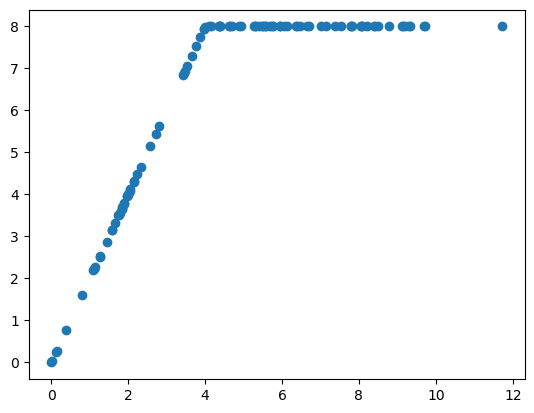

In [311]:
plt.scatter(datos_bateria['carga'], datos_bateria['duracion'])

Ya que la carga de la batería llega al máximo a las 4 horas de carga, filtramos el dataset para eliminar los datos que superern las 4 horas, ya que no nos sirven. Haciendo esto, podemos generar una regresión ya que puede ajustarse a los puntos de buena manera.

In [313]:
datos_filtrados = datos_batería[datos_batería['carga'] <= 4]

#### Ejecutamos el modelo con los órdenes especificados: 

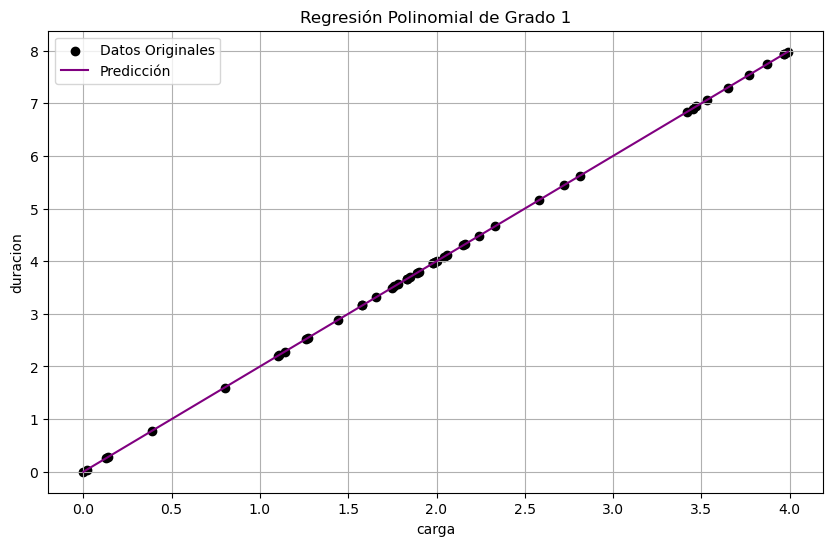

Intercepto:  0.0 Coeficiente(s):  [2.] R2:  1.0


In [315]:
#REGRESION DE GRADO 1
regression(datos_filtrados, 'carga', 'duracion', 1)

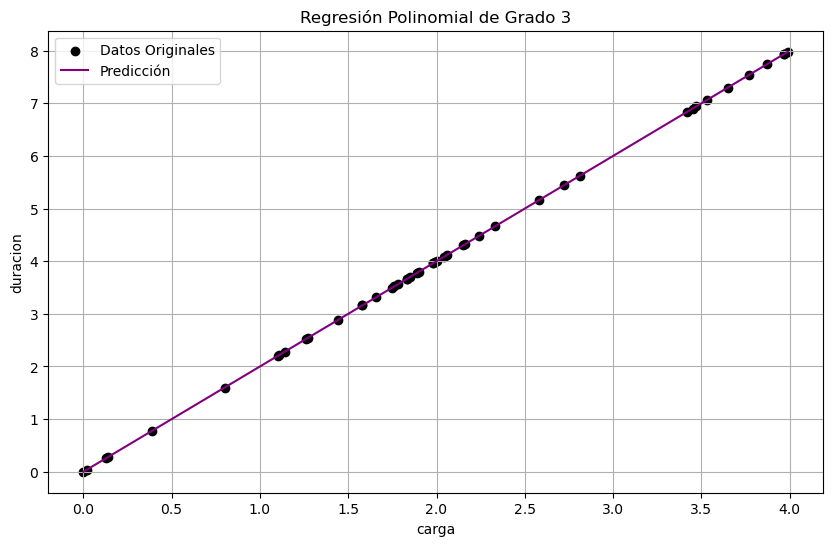

Intercepto:  1.7763568394002505e-15 Coeficiente(s):  [ 2.00000000e+00  3.25565788e-16 -4.02524352e-17] R2:  1.0


In [316]:
#REGRESION DE GRADO 3
regression(datos_filtrados, 'carga', 'duracion', 3)

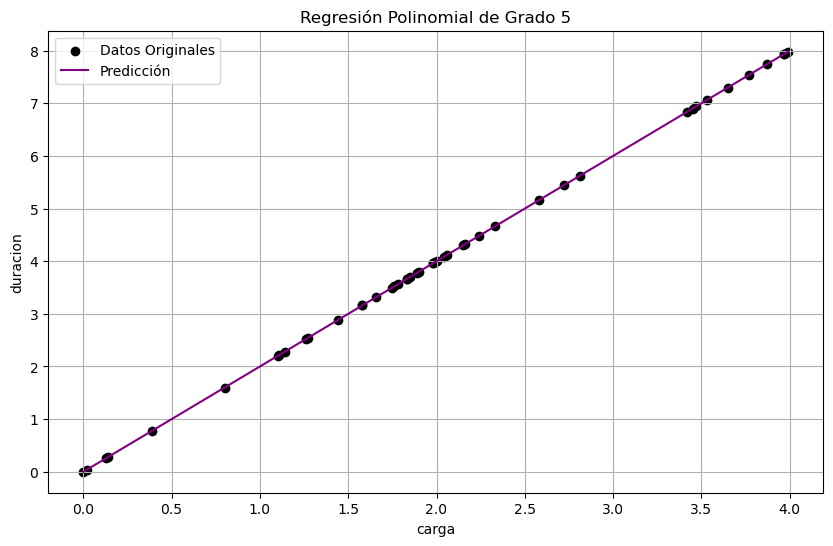

Intercepto:  1.5987211554602254e-14 Coeficiente(s):  [ 2.00000000e+00  5.91473946e-15 -3.88270241e-15  1.02895465e-15
 -1.71297849e-16] R2:  1.0


In [317]:
#REGRESION DE GRADO 5
regression(datos_filtrados, 'carga', 'duracion', 5)

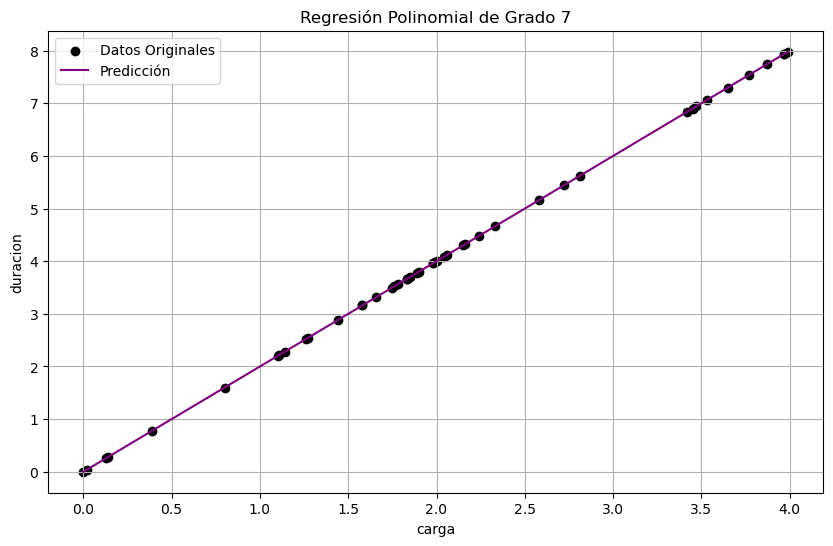

Intercepto:  4.440892098500626e-15 Coeficiente(s):  [ 2.00000000e+00  6.20506626e-15 -8.04211841e-15  8.09588009e-15
 -4.44543823e-15  1.12006673e-15 -1.02803355e-16] R2:  1.0


In [318]:
#REGRESION DE GRADO 7
regression(datos_filtrados, 'carga', 'duracion', 7)

### Analizamos los R2 de los distintos modelos

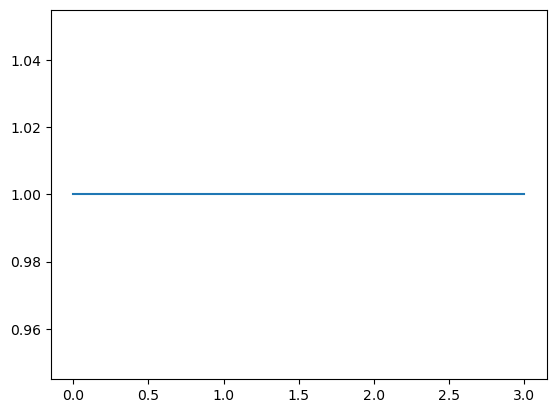

In [320]:
errores = [1, 1, 1, 1]
plt.plot(errores)

Venos que los errores son todos iguales, y de 1, lo que significa que el 100% de la duracion es explicada por la carga. Nuestros datos se ajustan exactamente a nuestros modelos, en este caso debemos tomar el modelo más simple, que es el de primer grado.

## DATASET SALARIOS

In [323]:
datos_salarios = pd.read_csv('Salarios_minimos.csv')
datos_salarios.columns

Index(['Periodo', 'Salario'], dtype='object')

#### Analizamos los datos para verificar la factibilidad del modelo

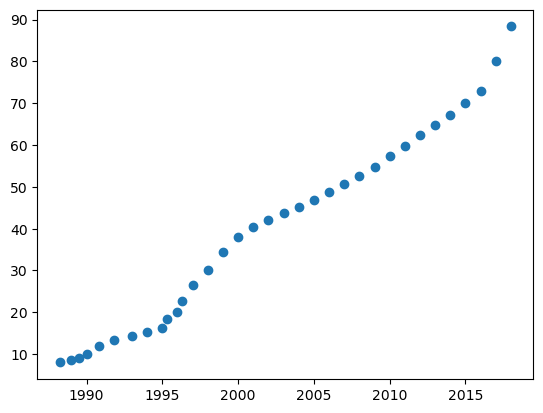

In [325]:
plt.scatter(datos_salarios['Periodo'], datos_salarios['Salario'])

Vemos que una linea se puede ajustar a nuestros datos, sin embargo, los años, son números en una escala relativamente alta, y cuando generemos los modelos polinomiales, los valores se van a acrecentar muy rápido. Por lo que podemos escalar los datos con el fin de evitar número excesivamente altos.

In [327]:
datos_escalados = pd.DataFrame()
datos_escalados['Periodo'] = datos_salarios['Periodo']/1000
datos_escalados['Salario'] = datos_salarios['Salario']

#### Ejecutamos los modelos con los órdenes deseados

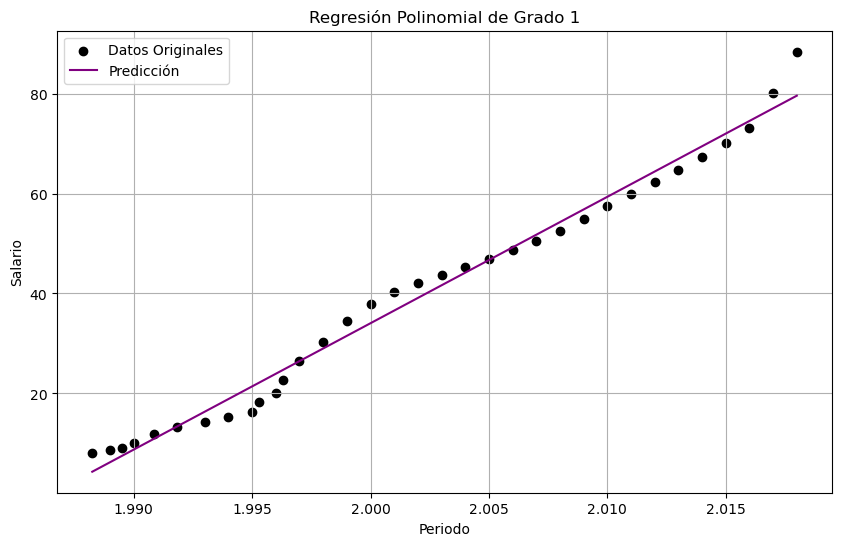

Intercepto:  -5022.602171641451 Coeficiente(s):  [2528.32884781] R2:  0.9844566663095191


In [329]:
#REGRESION DE GRADO 1
regression(datos_escalados, 'Periodo', 'Salario', 1)

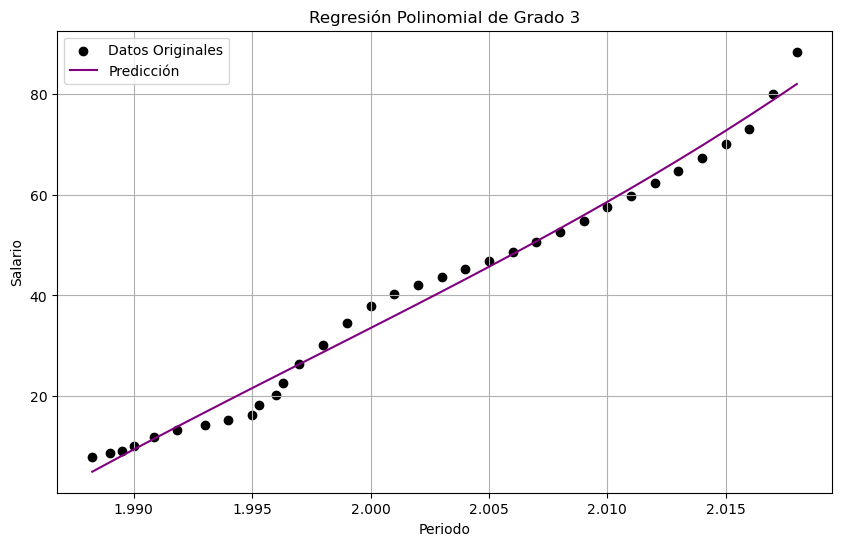

Intercepto:  -5217722.939278915 Coeficiente(s):  [ 7831462.41207241 -3919341.08579756   654024.49739505] R2:  0.9857366949636646


In [330]:
#REGRESION DE GRADO 3
regression(datos_escalados, 'Periodo', 'Salario', 3)

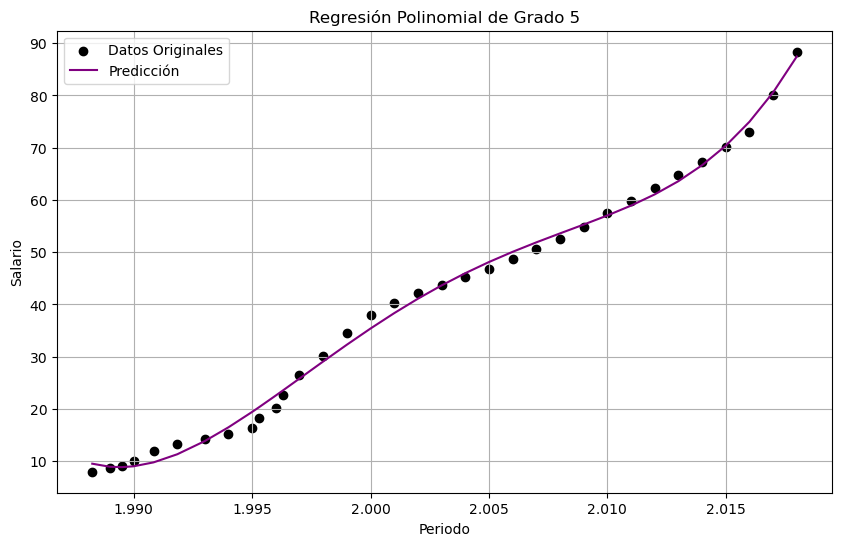

Intercepto:  -42354657638.975975 Coeficiente(s):  [ 1.10322281e+11 -1.14745269e+11  5.95777621e+10 -1.54441205e+10
  1.59921888e+09] R2:  0.9961517932603401


In [331]:
#REGRESION DE GRADO 5
regression(datos_escalados, 'Periodo', 'Salario', 5)

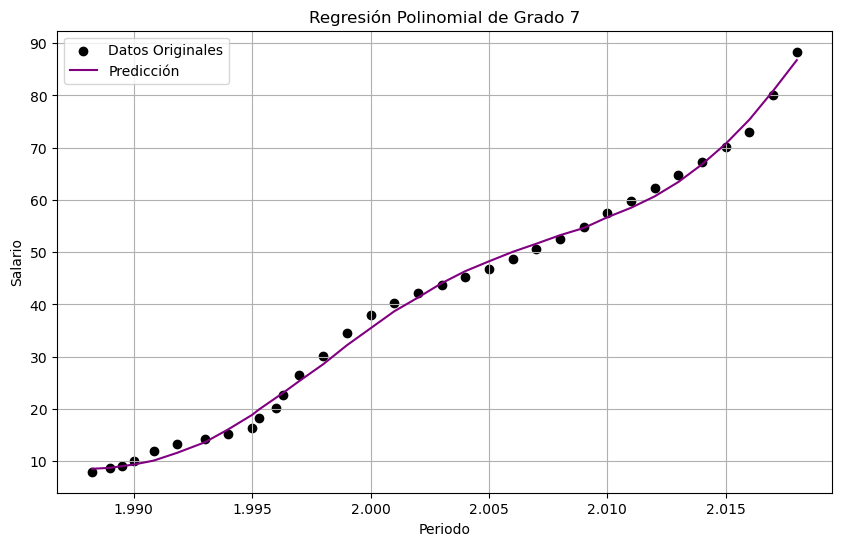

Intercepto:  -35786528092241.625 Coeficiente(s):  [ 7.04530263e+13 -2.37285269e+13 -4.83097442e+13  5.80912760e+13
 -2.75764421e+13  6.28223096e+12 -5.68785259e+11] R2:  0.9964631940396839


In [332]:
#REGRESION DE GRADO 7
regression(datos_escalados, 'Periodo', 'Salario', 7)

Podemos observar que los datos predicho se van asemejando cada vez más a los datos conforme el orden aumenta, sin embargo, debemos analizar el R2 antes de llegar a conclusiones.

#### Analizamos el R2

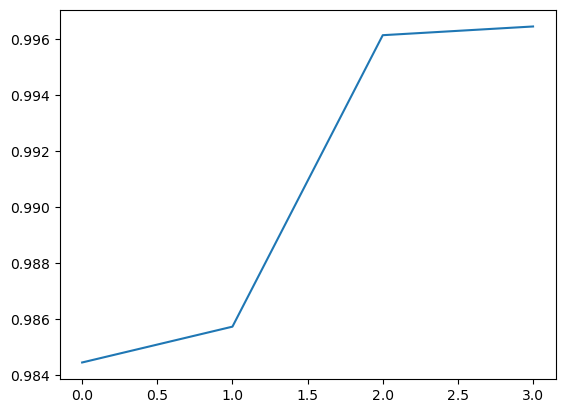

In [335]:
errores = [0.9844566663095191, 0.9857366949636646, 0.9961517932603401, 0.9964631940396839]
plt.plot(errores)

Podemos ver que si graficamos el R2, el modelo de primer y tercer orden tienen valores cercanos al 98.5%, sin embargo, los de órdenes 5 y 7, tienen errores cercanos al 99.6%, lo cual nos puede indicar un sobreajuste de la recta, sin embargo, vemos que todos los modelos demuestran que la variable predictora hace un buen trabajo al darnos información de la variable predicha.